<a href="https://colab.research.google.com/github/sakshimodi04/Data_Science/blob/main/crime_data_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
crime_data = pd.read_csv("/content/crime_data.csv")

In [3]:
crime_data.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [4]:
# normalization function
def norm_func(i):
  x = (i-i.min())/(i.max()-i.min())
  return(x)

In [5]:
# normalized dataframe considering the numerical part of data
df_norm = norm_func(crime_data.iloc[:,1:])
df_norm

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465
5,0.427711,0.544521,0.779661,0.811370
6,0.150602,0.222603,0.762712,0.098191
7,0.307229,0.660959,0.677966,0.219638
8,0.879518,0.993151,0.813559,0.635659
9,1.000000,0.568493,0.474576,0.478036


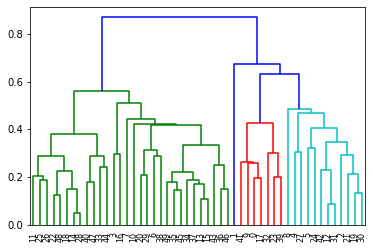

In [6]:
# create dendrogram
dendrogram = sch.dendrogram(sch.linkage(df_norm,method='average'))


In [7]:
0#613406134287061342806134287061342874/ create clusters
hc = AgglomerativeClustering(n_clusters=3,affinity="euclidean",linkage="average")

In [8]:
#save clusters for chart
y_hc = hc.fit_predict(df_norm)
clusters = pd.DataFrame(y_hc,columns=['clusters'])

In [9]:
clusters

,clusters
0,0
1,2
2,0
3,1
4,0
5,0
6,1
7,1
8,0
9,0


In [10]:
df_norm['h_clusterid'] = clusters

In [11]:
df_norm.sort_values("h_clusterid")

,Murder,Assault,UrbanPop,Rape,h_clusterid
0,0.746988,0.654110,0.440678,0.359173,0
42,0.716867,0.534247,0.813559,0.470284,0
41,0.746988,0.489726,0.457627,0.506460,0
39,0.819277,0.801370,0.271186,0.392765,0
32,0.734940,1.000000,0.220339,0.227390,0
31,0.620482,0.715753,0.915254,0.485788,0
30,0.638554,0.821918,0.644068,0.640827,0
27,0.686747,0.708904,0.830508,1.000000,0
23,0.921687,0.732877,0.203390,0.253230,0
21,0.680723,0.719178,0.711864,0.718346,0


K- Means

In [12]:
from sklearn.cluster import KMeans

In [13]:
#normalizing function
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_crime_data = scaler.fit_transform(crime_data.iloc[:,1:])
scaled_crime_data

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

In [14]:
# how to find optimum number of cluster
# the k-means  algorithm aims to choose centroids that minimise the inertia or within clusters sum of sqaures criterion:

In [16]:

wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(scaled_crime_data)
  wcss.append(kmeans.inertia_)

  

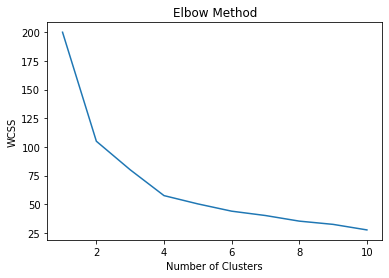

In [19]:
plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [20]:
# build cluster algorithm
cluster_new = KMeans(4,random_state=42)
cluster_new.fit(scaled_crime_data)

KMeans(n_clusters=4, random_state=42)

In [21]:
cluster_new.labels_

array([1, 2, 2, 1, 2, 2, 0, 0, 2, 1, 0, 3, 2, 0, 3, 0, 3, 1, 3, 2, 0, 2,
       3, 1, 2, 3, 3, 2, 3, 0, 2, 2, 1, 3, 0, 0, 0, 0, 0, 1, 3, 1, 2, 0,
       3, 0, 0, 3, 3, 0], dtype=int32)

In [22]:
#assign clusters to data set
crime_data['clusterid_new'] = cluster_new.labels_

In [23]:
crime_data

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clusterid_new
0,Alabama,13.2,236,58,21.2,1
1,Alaska,10.0,263,48,44.5,2
2,Arizona,8.1,294,80,31.0,2
3,Arkansas,8.8,190,50,19.5,1
4,California,9.0,276,91,40.6,2
5,Colorado,7.9,204,78,38.7,2
6,Connecticut,3.3,110,77,11.1,0
7,Delaware,5.9,238,72,15.8,0
8,Florida,15.4,335,80,31.9,2
9,Georgia,17.4,211,60,25.8,1


In [24]:
crime_data.groupby('clusterid_new').agg(['mean']).reset_index()

,clusterid_new,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,0,5.656250,138.875000,73.875000,18.781250
1,1,13.937500,243.625000,53.750000,21.412500
2,2,10.815385,257.384615,76.000000,33.192308
3,3,3.600000,78.538462,52.076923,12.176923


In [25]:
crime_data[crime_data['clusterid_new']==0]

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clusterid_new
6,Connecticut,3.3,110,77,11.1,0
7,Delaware,5.9,238,72,15.8,0
10,Hawaii,5.3,46,83,20.2,0
13,Indiana,7.2,113,65,21.0,0
15,Kansas,6.0,115,66,18.0,0
20,Massachusetts,4.4,149,85,16.3,0
29,New Jersey,7.4,159,89,18.8,0
34,Ohio,7.3,120,75,21.4,0
35,Oklahoma,6.6,151,68,20.0,0
36,Oregon,4.9,159,67,29.3,0


DBSCAN

In [26]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [27]:
crime_data.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clusterid_new
0,Alabama,13.2,236,58,21.2,1
1,Alaska,10.0,263,48,44.5,2
2,Arizona,8.1,294,80,31.0,2
3,Arkansas,8.8,190,50,19.5,1
4,California,9.0,276,91,40.6,2


In [28]:
crime_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     50 non-null     object 
 1   Murder         50 non-null     float64
 2   Assault        50 non-null     int64  
 3   UrbanPop       50 non-null     int64  
 4   Rape           50 non-null     float64
 5   clusterid_new  50 non-null     int32  
dtypes: float64(2), int32(1), int64(2), object(1)
memory usage: 2.3+ KB


In [29]:
 df=crime_data.iloc[:,1:]
 df

,Murder,Assault,UrbanPop,Rape,clusterid_new
0,13.2,236,58,21.2,1
1,10.0,263,48,44.5,2
2,8.1,294,80,31.0,2
3,8.8,190,50,19.5,1
4,9.0,276,91,40.6,2
5,7.9,204,78,38.7,2
6,3.3,110,77,11.1,0
7,5.9,238,72,15.8,0
8,15.4,335,80,31.9,2
9,17.4,211,60,25.8,1


In [30]:
array = df.values

In [31]:
array

array([[ 13.2, 236. ,  58. ,  21.2,   1. ],
       [ 10. , 263. ,  48. ,  44.5,   2. ],
       [  8.1, 294. ,  80. ,  31. ,   2. ],
       [  8.8, 190. ,  50. ,  19.5,   1. ],
       [  9. , 276. ,  91. ,  40.6,   2. ],
       [  7.9, 204. ,  78. ,  38.7,   2. ],
       [  3.3, 110. ,  77. ,  11.1,   0. ],
       [  5.9, 238. ,  72. ,  15.8,   0. ],
       [ 15.4, 335. ,  80. ,  31.9,   2. ],
       [ 17.4, 211. ,  60. ,  25.8,   1. ],
       [  5.3,  46. ,  83. ,  20.2,   0. ],
       [  2.6, 120. ,  54. ,  14.2,   3. ],
       [ 10.4, 249. ,  83. ,  24. ,   2. ],
       [  7.2, 113. ,  65. ,  21. ,   0. ],
       [  2.2,  56. ,  57. ,  11.3,   3. ],
       [  6. , 115. ,  66. ,  18. ,   0. ],
       [  9.7, 109. ,  52. ,  16.3,   3. ],
       [ 15.4, 249. ,  66. ,  22.2,   1. ],
       [  2.1,  83. ,  51. ,   7.8,   3. ],
       [ 11.3, 300. ,  67. ,  27.8,   2. ],
       [  4.4, 149. ,  85. ,  16.3,   0. ],
       [ 12.1, 255. ,  74. ,  35.1,   2. ],
       [  2.7,  72. ,  66. ,  14

In [32]:
stdscaler = StandardScaler().fit(array)
X = stdscaler.transform(array)

In [33]:
dbscan = DBSCAN(eps=1,min_samples=8)
dbscan.fit(X)

DBSCAN(eps=1, min_samples=8)

In [34]:
# noisy samples are given the labels as -1
dbscan.labels_

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0, -1,  1,  0,  1, -1,
       -1,  0, -1, -1, -1,  0, -1, -1, -1,  0, -1,  0, -1, -1, -1, -1,  0,
        1,  1, -1,  1, -1, -1,  0, -1, -1, -1, -1,  1,  1, -1,  0,  1])

In [35]:
cl=pd.DataFrame(dbscan.labels_,columns=['cluster'])
cl

,cluster
0,-1
1,-1
2,-1
3,-1
4,-1
5,-1
6,-1
7,-1
8,-1
9,-1


In [36]:
clustered = pd.concat([df,cl],axis=1)

In [37]:
clustered[clustered['cluster']==-1]
clustered

,Murder,Assault,UrbanPop,Rape,clusterid_new,cluster
0,13.2,236,58,21.2,1,-1
1,10.0,263,48,44.5,2,-1
2,8.1,294,80,31.0,2,-1
3,8.8,190,50,19.5,1,-1
4,9.0,276,91,40.6,2,-1
5,7.9,204,78,38.7,2,-1
6,3.3,110,77,11.1,0,-1
7,5.9,238,72,15.8,0,-1
8,15.4,335,80,31.9,2,-1
9,17.4,211,60,25.8,1,-1
